In [2]:
# Import packages and set fig options

import numpy as np
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
import seaborn as sns
sns.set_context("talk", rc={"font.size": 17,
                            "axes.titlesize": 17,
                            "axes.labelsize": 18,
                            "legend.fontsize": 15,
                            "xtick.labelsize": 16,
                            "ytick.labelsize": 16})

In [3]:
# Data (from my watch) and transformation as in Dissertation

step_data1 = np.array([6847, 4083, 8058, 2725, 5711, 4078, 3168, 8495, 7368, 2920, 3540, 11465, 9404, 9733, 11113, 12435, 14505, 8247, 18083, 12394, 11561, 20272, 13350, 8050, 9001, 15478, 9311, 13072, 12348, 10643, 16705])
step_data = np.round(step_data1/1000,0)
n = len(step_data)

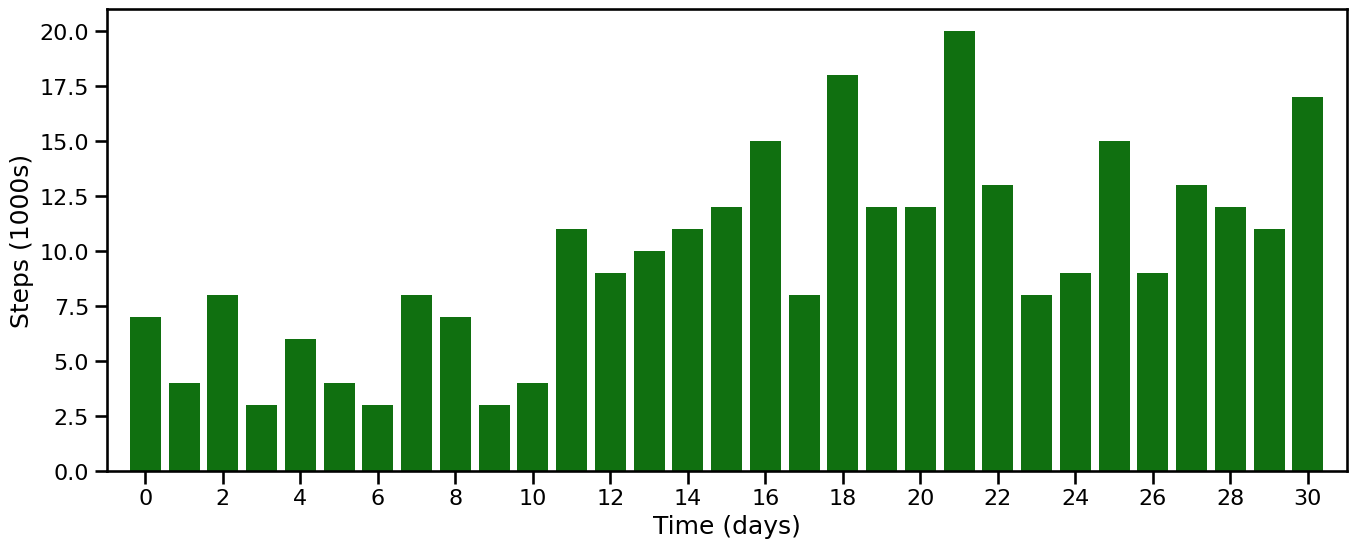

In [4]:
# Plot of data

figsize(16, 6)

sns.barplot(x = np.arange(n), y = step_data, color="green")
plt.xlabel("Time (days)")
plt.xticks(np.arange(n,step=2))
plt.ylabel("Steps (1000s)")
plt.xlim(-1, n);

In [5]:
import pymc as pm

with pm.Model() as model:
    alpha = 4
    beta = 2.5

    # Defining prior distributions
    lambda_1 = pm.Gamma("lambda_1", alpha=alpha, beta=1/beta)
    lambda_2 = pm.Gamma("lambda_2", alpha=alpha, beta=1/beta)
    tau = pm.DiscreteUniform("tau", lower=0, upper=n-1)

<>:17: SyntaxWarning: invalid escape sequence '\l'
<>:17: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipython-input-721444863.py:17: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel("$\lambda_i$ value")
/tmp/ipython-input-721444863.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="upper left")


np.float64(4.9967462982864)

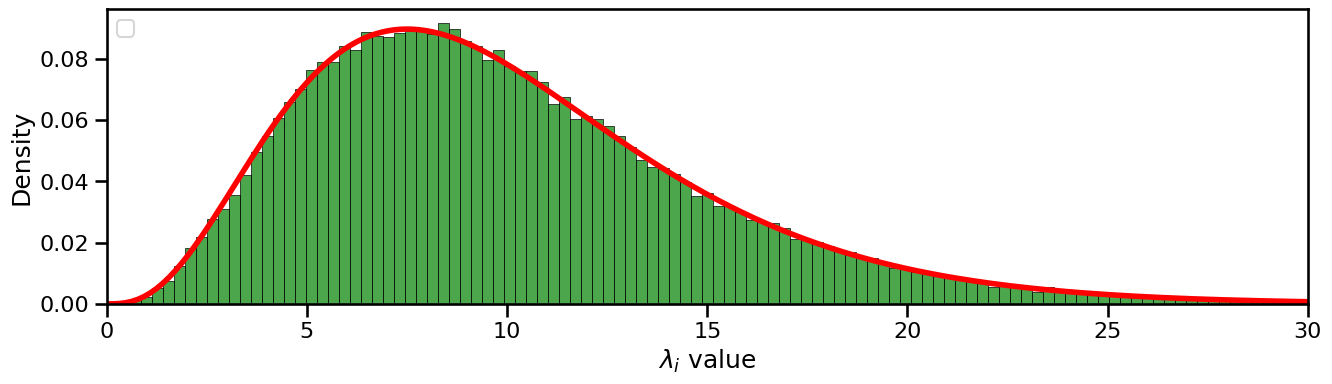

In [6]:
from scipy.stats import gamma

figsize(15.5, 13)
alpha = 4
beta = 2.5


ax = plt.subplot(311)

xs = np.linspace(0, 31, 200)
ax.plot(xs,gamma.pdf(xs, a=alpha, scale=beta), lw=4, color="red")

x = pm.Gamma.dist(alpha=alpha, beta=1/beta, size=100000)
sns.histplot(x.eval(), color="green", stat="density", alpha = 0.7)
plt.legend(loc="upper left")

plt.xlabel("$\lambda_i$ value")
plt.xlim([0,30])

np.sqrt(np.var(x.eval()))

In [7]:
#switch point

with model:
    idx = np.arange(31)
    lambda_ = pm.math.switch(tau > idx, lambda_1, lambda_2)

In [8]:

#likelihood
with model:
    observation = pm.Poisson("obs", lambda_, observed=step_data)

In [9]:
# sample
with model:
    step = pm.Metropolis()
    trace = pm.sample(10000, tune=1000, step=step, return_inferencedata=False)

Output()

In [10]:
lambda_1_samples = trace['lambda_1']
lambda_2_samples = trace['lambda_2']
tau_samples = trace['tau']

print(np.mean(lambda_1_samples))
print(np.mean(lambda_2_samples))

5.513619220759578
12.244950371383958


<>:7: SyntaxWarning: invalid escape sequence '\l'
<>:12: SyntaxWarning: invalid escape sequence '\l'
<>:18: SyntaxWarning: invalid escape sequence '\l'
<>:22: SyntaxWarning: invalid escape sequence '\l'
<>:7: SyntaxWarning: invalid escape sequence '\l'
<>:12: SyntaxWarning: invalid escape sequence '\l'
<>:18: SyntaxWarning: invalid escape sequence '\l'
<>:22: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipython-input-1151761001.py:7: SyntaxWarning: invalid escape sequence '\l'
  label="posterior of $ \lambda_1$", color="#A60628")
/tmp/ipython-input-1151761001.py:12: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel("$ \lambda_1$ value")
/tmp/ipython-input-1151761001.py:18: SyntaxWarning: invalid escape sequence '\l'
  label="posterior of $\lambda_2$", color="#7A68A6")
/tmp/ipython-input-1151761001.py:22: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel("$ \lambda_2$ value")


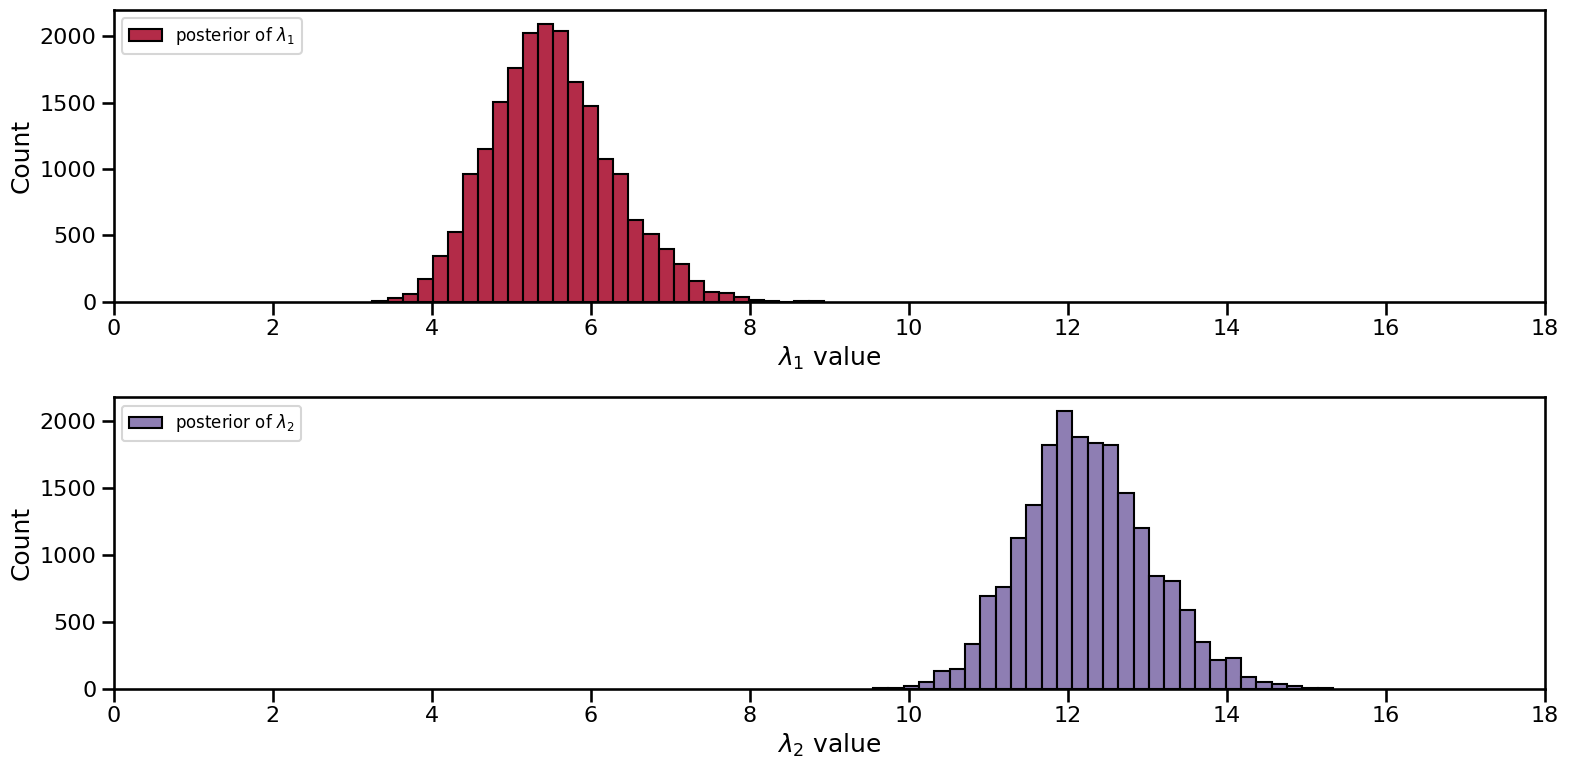

In [13]:
figsize(16, 8)

#histogram of the samples from posterior:

plt.subplot(211)
sns.histplot(lambda_1_samples,  bins=30, alpha=0.85,
         label="posterior of $ \lambda_1$", color="#A60628")

plt.xlim([0, 18])
#plt.ylim([0,0.08])
plt.legend(loc="upper left", fontsize=12)
plt.xlabel("$ \lambda_1$ value")
plt.tight_layout()


plt.subplot(212)
sns.histplot(lambda_2_samples, bins=30, alpha=0.85,
         label="posterior of $\lambda_2$", color="#7A68A6")
plt.legend(loc="upper left" ,fontsize=12)
plt.xlim([0, 18])
#plt.ylim([0,0.08])
plt.xlabel("$ \lambda_2$ value")
plt.tight_layout()



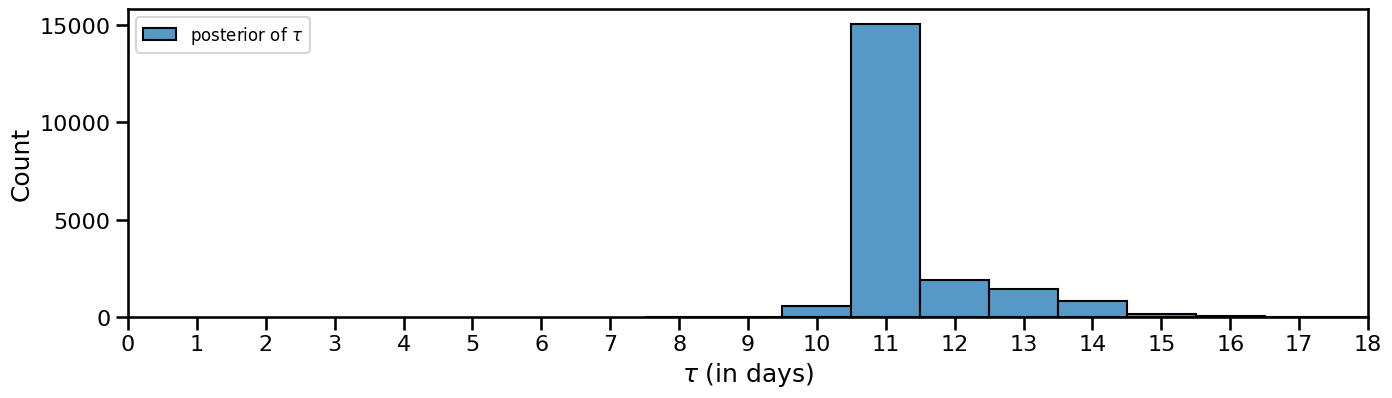

In [12]:
figsize(16, 4)
sns.histplot(tau_samples, bins=n,  discrete=True,
         label=r"posterior of $\tau$")
         #color="#467821", weights=w, rwidth=2.)
plt.xticks(np.arange(n))
plt.xlim([0, 18])
plt.legend(loc="upper left", fontsize=12)
plt.xlabel(r"$\tau$ (in days)")


plt.subplots_adjust(hspace=0.4)